In [2]:
from src.VGG16_model import VGG16_model_transfer
from src.dataset_info import *
from src.Bigearth import Bigearth
import torch

print(LABELS_DS.__len__())

vgg_16 = VGG16_model_transfer()
vgg_16.load(43,True)
print(vgg_16.vgg16)

43


c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\nikos\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

(224, 224, 3)
Sea and ocean


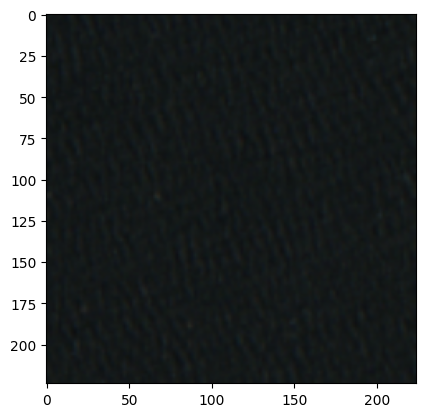

In [3]:
### dataloader check
import matplotlib.pyplot as plt
bigearth_data_loader = Bigearth()
img, label_vect = bigearth_data_loader[1]
print(img.shape)
plt.imshow(img)
for n,i in enumerate(label_vect):
    if i == 1:
        print(LABELS_DS[n])

In [4]:
from torchvision import transforms
cuda = torch.device('cuda')
img_torch = torch.unsqueeze(torch.from_numpy(img).T,0).cuda()
print(img_torch.shape)

print(vgg_16.forward_pass(img_torch))

C:\Users\nikos\AppData\Local\Temp\ipykernel_2872\3496944715.py:3: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3575.)
  img_torch = torch.unsqueeze(torch.from_numpy(img).T,0).cuda()


torch.Size([1, 3, 224, 224])
tensor([[ 0.0418,  0.0537, -0.0939, -0.1030,  0.0061,  0.0111, -0.0127, -0.0148,
          0.0887,  0.1097,  0.0207,  0.0562, -0.0285,  0.0185, -0.0974,  0.0805,
         -0.0495,  0.0370,  0.0447,  0.0938, -0.0519, -0.0415,  0.0113, -0.0050,
          0.0624,  0.1759,  0.0315,  0.0488,  0.0476, -0.0936,  0.0191, -0.0202,
         -0.0575,  0.0751, -0.0441,  0.1053,  0.0377,  0.0727,  0.0549,  0.0559,
         -0.0269, -0.0170, -0.0402]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [5]:
from src.Bigearth import Bigearth, Dataloader
bigearth_dl = Bigearth()
dataloader = Dataloader(bigearth_dl)
vgg_16.train(1,dataloader)

100%|█████████▉| 399/400 [00:04<00:00, 83.32it/s]


EPOCH: 1, TEST_LOSS1.1583727330404383, TEST_ACCURACY0.175


([5.644330223202705], [1.1583727330404383], [0.5175], [0.175])